In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Model Building
from keras.utils import np_utils

from keras.models import *
from keras.layers import *
from keras.callbacks import *
import keras.backend as k

In [383]:
reviews_df = pd.read_csv('NLP_Data/train.csv',parse_dates= [4])
reviews_df.summary=reviews_df.summary.astype(str)
reviews_df.positives=reviews_df.positives.astype(str)
reviews_df.negatives=reviews_df.negatives.astype(str)
reviews_df.negatives=reviews_df.advice_to_mgmt.astype(str)
reviews_df = reviews_df.replace(np.nan, '', regex=True)



reviews_df


,ID,Place,location,date,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall
0,1,startup_1,,"Dec 11, 2018",Current Employee,Anonymous Employee,Best Company to work for,People are smart and friendly,nan,,4,5,5,4,5,0,5.0
1,2,startup_1,"Mountain View, CA","Jun 21, 2013",Former Employee,Program Manager,"Moving at the speed of light, burn out is inev...","1) Food, food, food. 15+ cafes on main campus ...",1) Don't dismiss emotional intelligence and ad...,1) Don't dismiss emotional intelligence and ad...,2,3,3,5,3,2094,5.0
2,3,startup_1,"New York, NY","May 10, 2014",Current Employee,Software Engineer III,Great balance between big-company security and...,"* If you're a software engineer, you're among ...",Keep the focus on the user. Everything else wi...,Keep the focus on the user. Everything else wi...,5,4,5,5,4,949,5.0
3,4,startup_1,"Mountain View, CA","Feb 8, 2015",Current Employee,Anonymous Employee,The best place I've worked and also the most d...,You can't find a more well-regarded company th...,Keep on NOT micromanaging - that is a huge ben...,Keep on NOT micromanaging - that is a huge ben...,2,5,5,4,5,498,4.0
4,10,startup_1,,"Dec 9, 2018",Current Employee,Anonymous Employee,Execellent for engineers,Impact driven. Best tech in the world.,nan,,5,5,5,5,5,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30331,67522,startup_6,,"Dec 22, 2010",Former Employee,Senior Project Managet,Microsoft Services is bad.,MS is a good company but hire wrong people. Wo...,Major management revamp esp in APAC. It's not ...,Major management revamp esp in APAC. It's not ...,3,,1.5,2,1,0,2.0
30332,67524,startup_6,,"Dec 17, 2010",Former Employee,Senior Program Manager,Good company.,"Good benefits package, huge customer base.",Move on.,Move on.,3.5,,3.5,4,4,0,4.0
30333,67525,startup_6,,"Dec 16, 2010",Former Employee,Anonymous Employee,Enriching experience for a beginner but bad fo...,"-Access to a wide range of technologies, compl...",Make the company leaner and Meaner. (which wou...,Make the company leaner and Meaner. (which wou...,3,,4,4,2,0,3.0
30334,67527,startup_6,,"Dec 15, 2010",Current Employee,Account Manager,Good Place to Work,Nice place to work. Good atmosphere with advan...,nan,,3,,4,4.5,3.5,0,4.0


In [384]:
reviews_df["summary"] = reviews_df["summary"] +" "+ reviews_df["positives"] + " " + reviews_df["negatives"]+ " "  + reviews_df["advice_to_mgmt"]
reviews_df['summary'][1]

'Moving at the speed of light, burn out is inevitable 1) Food, food, food. 15+ cafes on main campus (MTV) alone. Mini-kitchens, snacks, drinks, free breakfast/lunch/dinner, all day, errr\'day.  2) Benefits/perks. Free 24:7 gym access (on MTV campus). Free (self service) laundry (washer/dryer) available. Bowling alley. Volley ball pit. Custom-built and exclusive employee use only outdoor sport park (MTV). Free health/fitness assessments. Dog-friendly. Etc. etc. etc.  3) Compensation. In ~2010 or 2011, Google updated its compensation packages so that they were more competitive.  4) For the size of the organization (30K+), it has remained relatively innovative, nimble, and fast-paced and open with communication but, that is definitely changing (for the worse).  5) With so many departments, focus areas, and products, *in theory*, you should have plenty of opportunity to grow your career (horizontally or vertically). In practice, not true.  6) You get to work with some of the brightest, mos

In [385]:
from bs4 import BeautifulSoup
# Text Cleaning
#Let's define a function to clean the text data.
def cleaner(text):

  text = BeautifulSoup(text).get_text()
  
  # fetch alphabetic characters
  #text = re.sub('http[s]?://\S+', '', text) 
  #print(text)
  text = re.sub("[^a-zA-Z]", " ", text)
  text = re.sub(r'\bnan\b', " ", text)

  # convert text to lower case
  text = text.lower()

  # split text into tokens to remove whitespaces
  tokens = text.split()

  return " ".join(tokens)

In [386]:
# call preprocessing function
import re 

reviews_df['summary'] = reviews_df['summary'].apply(cleaner)
reviews_df['summary'][1]

'moving at the speed of light burn out is inevitable food food food cafes on main campus mtv alone mini kitchens snacks drinks free breakfast lunch dinner all day errr day benefits perks free gym access on mtv campus free self service laundry washer dryer available bowling alley volley ball pit custom built and exclusive employee use only outdoor sport park mtv free health fitness assessments dog friendly etc etc etc compensation in or google updated its compensation packages so that they were more competitive for the size of the organization k it has remained relatively innovative nimble and fast paced and open with communication but that is definitely changing for the worse with so many departments focus areas and products in theory you should have plenty of opportunity to grow your career horizontally or vertically in practice not true you get to work with some of the brightest most innovative and hard working diligent minds in the industry there s a con to that too see below don t 

In [387]:
# Feature Engineering
#drop the ID column
reviews_df.drop(['ID'], axis=1, inplace=True)
# Change the date column to day_of_week, w
reviews_df['date'] = pd.to_datetime(reviews_df['date'], format = ' %b %d, %Y',errors='coerce',infer_datetime_format=True)
reviews_df['date_year'] = reviews_df['date'].dt.year
reviews_df['date_month'] = reviews_df['date'].dt.month
reviews_df['date_week'] = reviews_df['date'].dt.week
reviews_df['date_day'] = reviews_df['date'].dt.day
reviews_df['date_dayofweek'] = reviews_df['date'].dt.dayofweek
reviews_df.drop(['date'], axis=1, inplace=True)
reviews_df                     


,Place,location,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall,date_year,date_month,date_week,date_day,date_dayofweek
0,startup_1,,Current Employee,Anonymous Employee,best company to work for people are smart and ...,People are smart and friendly,nan,,4,5,5,4,5,0,5.0,2018.0,12.0,50.0,11.0,1.0
1,startup_1,"Mountain View, CA",Former Employee,Program Manager,moving at the speed of light burn out is inevi...,"1) Food, food, food. 15+ cafes on main campus ...",1) Don't dismiss emotional intelligence and ad...,1) Don't dismiss emotional intelligence and ad...,2,3,3,5,3,2094,5.0,2013.0,6.0,25.0,21.0,4.0
2,startup_1,"New York, NY",Current Employee,Software Engineer III,great balance between big company security and...,"* If you're a software engineer, you're among ...",Keep the focus on the user. Everything else wi...,Keep the focus on the user. Everything else wi...,5,4,5,5,4,949,5.0,2014.0,5.0,19.0,10.0,5.0
3,startup_1,"Mountain View, CA",Current Employee,Anonymous Employee,the best place i ve worked and also the most d...,You can't find a more well-regarded company th...,Keep on NOT micromanaging - that is a huge ben...,Keep on NOT micromanaging - that is a huge ben...,2,5,5,4,5,498,4.0,2015.0,2.0,6.0,8.0,6.0
4,startup_1,,Current Employee,Anonymous Employee,execellent for engineers impact driven best te...,Impact driven. Best tech in the world.,nan,,5,5,5,5,5,0,4.0,2018.0,12.0,49.0,9.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30331,startup_6,,Former Employee,Senior Project Managet,microsoft services is bad ms is a good company...,MS is a good company but hire wrong people. Wo...,Major management revamp esp in APAC. It's not ...,Major management revamp esp in APAC. It's not ...,3,,1.5,2,1,0,2.0,2010.0,12.0,51.0,22.0,2.0
30332,startup_6,,Former Employee,Senior Program Manager,good company good benefits package huge custom...,"Good benefits package, huge customer base.",Move on.,Move on.,3.5,,3.5,4,4,0,4.0,2010.0,12.0,50.0,17.0,4.0
30333,startup_6,,Former Employee,Anonymous Employee,enriching experience for a beginner but bad fo...,"-Access to a wide range of technologies, compl...",Make the company leaner and Meaner. (which wou...,Make the company leaner and Meaner. (which wou...,3,,4,4,2,0,3.0,2010.0,12.0,50.0,16.0,3.0
30334,startup_6,,Current Employee,Account Manager,good place to work nice place to work good atm...,Nice place to work. Good atmosphere with advan...,nan,,3,,4,4.5,3.5,0,4.0,2010.0,12.0,50.0,15.0,2.0


In [388]:
#Encode the categorical features

def MultiLabelEncoder(columnlist,dataframe):
    for i in columnlist:

        labelencoder_X=LabelEncoder()
        reviews_df[i]=labelencoder_X.fit_transform(reviews_df[i])
columnlist=['Place','status','location','job_title']
MultiLabelEncoder(columnlist,reviews_df)
reviews_df.head(2)

,Place,location,status,job_title,summary,positives,negatives,advice_to_mgmt,score_1,score_2,score_3,score_4,score_5,score_6,overall,date_year,date_month,date_week,date_day,date_dayofweek
0,0,0,0,181,best company to work for people are smart and ...,People are smart and friendly,nan,,4,5,5,4,5,0,5.0,2018.0,12.0,50.0,11.0,1.0
1,0,816,1,2347,moving at the speed of light burn out is inevi...,"1) Food, food, food. 15+ cafes on main campus ...",1) Don't dismiss emotional intelligence and ad...,1) Don't dismiss emotional intelligence and ad...,2,3,3,5,3,2094,5.0,2013.0,6.0,25.0,21.0,4.0


In [389]:
#Now let's check the correlation of all the numerical columns with the target variable
numeric = ['score_1', 'score_2', 'score_3','score_4','score_5']
reviews_df[numeric] = reviews_df[numeric].apply(pd.to_numeric, errors='coerce')
#Determining correlations
corrs = reviews_df.corr()['overall'].abs()
corrs

Place             0.064572
location          0.021204
status            0.082515
job_title         0.024292
score_1           0.457094
score_2           0.420812
score_3           0.466800
score_4           0.399936
score_5           0.462248
score_6           0.014734
overall           1.000000
date_year         0.010089
date_month        0.001873
date_week         0.001516
date_day          0.004133
date_dayofweek    0.001824
Name: overall, dtype: float64

In [390]:
#We can observe from the above that only the Score1, Score2, Score3, Score4, Score5 
#have a high correlation with the Target variable, hence we will be taking only these columns 
#for prediction 

In [391]:
x = reviews_df['summary']
x

0        best company to work for people are smart and ...
1        moving at the speed of light burn out is inevi...
2        great balance between big company security and...
3        the best place i ve worked and also the most d...
4        execellent for engineers impact driven best te...
                               ...                        
30331    microsoft services is bad ms is a good company...
30332    good company good benefits package huge custom...
30333    enriching experience for a beginner but bad fo...
30334    good place to work nice place to work good atm...
30335    it s a competitive work place with overload wo...
Name: summary, Length: 30336, dtype: object

In [392]:
y = reviews_df['overall']
y

0        5.0
1        5.0
2        5.0
3        4.0
4        4.0
        ... 
30331    2.0
30332    4.0
30333    3.0
30334    4.0
30335    3.0
Name: overall, Length: 30336, dtype: float64

In [393]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences 

#prepare a tokenizer
x_tokenizer = Tokenizer() 

#prepare vocabulary
x_tokenizer.fit_on_texts(x)


In [394]:
len(x_tokenizer.word_index)

20955

In [395]:
thresh = 3

cnt=0
for key,value in x_tokenizer.word_counts.items():
  if value>=thresh:
    cnt=cnt+1

print(cnt)

10568


In [396]:
# prepare the tokenizer again
x_tokenizer = Tokenizer(num_words=cnt,oov_token='unk')

#prepare vocabulary
x_tokenizer.fit_on_texts(x)

In [397]:
#define threshold for maximum length of a setence
max_len=100
#convert text sequences into integer sequences
x_seq = x_tokenizer.texts_to_sequences(x)


#padding up with zero 
x_seq = pad_sequences(x_seq, padding='post', maxlen=max_len)
x_seq
#x_val_seq

array([[  58,   18,    2, ...,    0,    0,    0],
       [  62,   16,  123, ...,   82,    4,    1],
       [ 999, 2181,   36, ...,  415,   60,  604],
       ...,
       [2374,   87,   11, ...,    0,    0,    0],
       [  14,   34,    2, ...,    0,    0,    0],
       [  16,   33,    5, ...,    0,    0,    0]], dtype=int32)

In [398]:
#no. of unique words
x_voc_size = x_tokenizer.num_words +1
x_voc_size

10569

In [399]:
# define model architecture
k.clear_session()
model =  Sequential()
model.add(Embedding(x_voc_size, 50, trainable=True, input_shape=(max_len,)))  #embedding layer
  
model.add(Conv1D(128,3,padding='same'))  #conv1d layer
model.add(Dropout(0.1))

model.add(GlobalMaxPooling1D()) 
  
model.add(Dense(128,activation='relu'))  #dense layer

model.add(Dense(5 ,activation='softmax')) #output layer
model.summary() #summary of model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           528450    
_________________________________________________________________
conv1d (Conv1D)              (None, 100, 128)          19328     
_________________________________________________________________
dropout (Dropout)            (None, 100, 128)          0         
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               16512     
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 645       
Total params: 564,935
Trainable params: 564,935
Non-trainable params: 0
__________________________________________________

In [400]:
#define optimizer and loss
model.compile(optimizer='adam',loss='categorical_crossentropy')

#checkpoint to save best model during training
mc = ModelCheckpoint("weights.best.hdf5", verbose=1, save_best_only=True, mode='min')

In [401]:
#from keras.utils import np_utils
y = np_utils.to_categorical(y-1,num_classes=5)
y

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [402]:
model.fit(x_seq, y, batch_size=10,epochs=5, verbose=1, callbacks=[mc])

Epoch 1/5
3034/3034 [==============================] - 21s 7ms/step - loss: 1.3501
Epoch 2/5
3034/3034 [==============================] - 22s 7ms/step - loss: 1.2862
Epoch 3/5
3034/3034 [==============================] - 22s 7ms/step - loss: 1.1779
Epoch 4/5
3034/3034 [==============================] - 21s 7ms/step - loss: 0.9890
Epoch 5/5
3034/3034 [==============================] - 21s 7ms/step - loss: 0.7728


In [403]:
y_pred = model.predict_classes(x_seq)
y_pred

array([4, 4, 3, ..., 2, 2, 2])

In [404]:
y=np.where(y)[1]

(unique, counts) = np.unique(y, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies


array([[    0,   632],
       [    1,  3531],
       [    2,  9510],
       [    3, 10688],
       [    4,  5975]])

In [405]:
import numpy as np
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[    0,   613],
       [    1,  2625],
       [    2, 13212],
       [    3,  8769],
       [    4,  5117]])

In [406]:
y_pred_series = pd.Series(y_pred)
y_pred_series

0        4
1        4
2        3
3        3
4        3
        ..
30331    1
30332    2
30333    2
30334    2
30335    2
Length: 30336, dtype: int64

In [407]:
reviews_df = reviews_df[["score_1","score_2","score_3","score_4","score_5","overall"]]


In [408]:
x_series = pd.concat([x, y_pred_series], axis=1)

x_series.columns = ['summary', 'new_score']
final_df = pd.concat([x_series, reviews_df], axis=1)
final_df

,summary,new_score,score_1,score_2,score_3,score_4,score_5,overall
0,best company to work for people are smart and ...,4,4.0,5.0,5.0,4.0,5.0,5.0
1,moving at the speed of light burn out is inevi...,4,2.0,3.0,3.0,5.0,3.0,5.0
2,great balance between big company security and...,3,5.0,4.0,5.0,5.0,4.0,5.0
3,the best place i ve worked and also the most d...,3,2.0,5.0,5.0,4.0,5.0,4.0
4,execellent for engineers impact driven best te...,3,5.0,5.0,5.0,5.0,5.0,4.0
...,...,...,...,...,...,...,...,...
30331,microsoft services is bad ms is a good company...,1,3.0,NaN,1.5,2.0,1.0,2.0
30332,good company good benefits package huge custom...,2,3.5,NaN,3.5,4.0,4.0,4.0
30333,enriching experience for a beginner but bad fo...,2,3.0,NaN,4.0,4.0,2.0,3.0
30334,good place to work nice place to work good atm...,2,3.0,NaN,4.0,4.5,3.5,4.0


In [409]:
final_df.drop(['summary'], axis=1, inplace=True)

final_df.dtypes


new_score      int64
score_1      float64
score_2      float64
score_3      float64
score_4      float64
score_5      float64
overall      float64
dtype: object

In [410]:
#final_df = pd.to_numeric(final_df, errors='coerce').fillna(0)
#final_df
numeric = ['score_1', 'score_2', 'score_3','score_4','score_5']
final_df[numeric] = final_df[numeric].apply(pd.to_numeric, errors='coerce')

final_df

,new_score,score_1,score_2,score_3,score_4,score_5,overall
0,4,4.0,5.0,5.0,4.0,5.0,5.0
1,4,2.0,3.0,3.0,5.0,3.0,5.0
2,3,5.0,4.0,5.0,5.0,4.0,5.0
3,3,2.0,5.0,5.0,4.0,5.0,4.0
4,3,5.0,5.0,5.0,5.0,5.0,4.0
...,...,...,...,...,...,...,...
30331,1,3.0,NaN,1.5,2.0,1.0,2.0
30332,2,3.5,NaN,3.5,4.0,4.0,4.0
30333,2,3.0,NaN,4.0,4.0,2.0,3.0
30334,2,3.0,NaN,4.0,4.5,3.5,4.0


In [411]:
#df['race'].fillna(df.race.mode(), inplace=True)

cols = ["score_1","score_2","score_3","score_4","score_5"]
final_df[cols]=final_df[cols].fillna(final_df.mean().iloc[0])

# check to see if there are any missing values in our data set
final_df.isnull().any()

new_score    False
score_1      False
score_2      False
score_3      False
score_4      False
score_5      False
overall      False
dtype: bool

In [412]:
corrs = final_df.corr()['overall'].abs()
corrs

new_score    0.814701
score_1      0.389540
score_2      0.295944
score_3      0.381833
score_4      0.289328
score_5      0.391849
overall      1.000000
Name: overall, dtype: float64

,new_score,score_1,score_2,score_3,score_4,score_5,overall
new_score,1.000000,0.348080,0.276282,0.354795,0.278992,0.353313,0.814701
score_1,0.348080,1.000000,0.530781,0.491323,0.459600,0.586807,0.389540
score_2,0.276282,0.530781,1.000000,0.580899,0.497242,0.669248,0.295944
score_3,0.354795,0.491323,0.580899,1.000000,0.558636,0.641677,0.381833
score_4,0.278992,0.459600,0.497242,0.558636,1.000000,0.496594,0.289328
score_5,0.353313,0.586807,0.669248,0.641677,0.496594,1.000000,0.391849
overall,0.814701,0.389540,0.295944,0.381833,0.289328,0.391849,1.000000


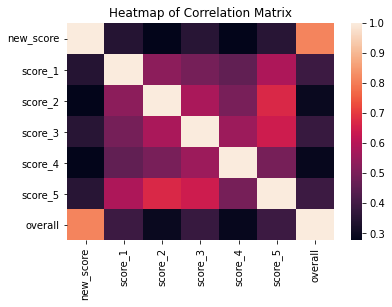

In [413]:
# Create a correlation matrix. What features correlate the most with turnover? What other correlations did you find?
corr = final_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

In [414]:
x = final_df[["score_1","score_2","score_3","score_4","score_5","new_score"]]
x

,score_1,score_2,score_3,score_4,score_5,new_score
0,4.0,5.000000,5.0,4.0,5.0,4
1,2.0,3.000000,3.0,5.0,3.0,4
2,5.0,4.000000,5.0,5.0,4.0,3
3,2.0,5.000000,5.0,4.0,5.0,3
4,5.0,5.000000,5.0,5.0,5.0,3
...,...,...,...,...,...,...
30331,3.0,2.499473,1.5,2.0,1.0,1
30332,3.5,2.499473,3.5,4.0,4.0,2
30333,3.0,2.499473,4.0,4.0,2.0,2
30334,3.0,2.499473,4.0,4.5,3.5,2


In [415]:
y = final_df[["overall"]]
y

,overall
0,5.0
1,5.0
2,5.0
3,4.0
4,4.0
...,...
30331,2.0
30332,4.0
30333,3.0
30334,4.0


In [416]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(x, y, test_size=0.3, random_state=0,shuffle=True)


In [417]:
from keras.models import Sequential
from keras import layers

input_dim = x_tr.shape[1]  # Number of features

model = Sequential()
model.add(layers.Dense(20, input_dim=input_dim, activation='relu'))
model.add(layers.Dense(5, activation='softmax'))
model.summary() #summary of model

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 20)                140       
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 105       
Total params: 245
Trainable params: 245
Non-trainable params: 0
_________________________________________________________________


In [418]:
#define optimizer and loss
model.compile(optimizer='adam',loss='categorical_crossentropy')

#checkpoint to save best model during training
mc = ModelCheckpoint("weights.best.hdf5", monitor='val_loss', verbose=1, save_best_only=True, mode='min')

In [419]:
#from keras.utils import np_utils
y_tr = np_utils.to_categorical(y_tr-1,  5)
y_tr

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [420]:
#from keras.utils import np_utils
y_val = np_utils.to_categorical(y_val-1,  5)
y_val

array([[0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0.]], dtype=float32)

In [421]:
model_history = model.fit(x_tr, y_tr, batch_size=10,epochs=40,validation_data=(x_val, y_val), verbose=1, callbacks=[mc])

Epoch 1/40
2118/2124 [============================>.] - ETA: 0s - loss: 1.1829- ETA: 
Epoch 00001: val_loss improved from inf to 0.97533, saving model to weights.best.hdf5
2124/2124 [==============================] - 2s 978us/step - loss: 1.1825 - val_loss: 0.9753
Epoch 2/40
2051/2124 [===========================>..] - ETA: 0s - loss: 0.9160
Epoch 00002: val_loss improved from 0.97533 to 0.84557, saving model to weights.best.hdf5
2124/2124 [==============================] - 2s 944us/step - loss: 0.9158 - val_loss: 0.8456
Epoch 3/40
2064/2124 [============================>.] - ETA: 0s - loss: 0.8287
Epoch 00003: val_loss improved from 0.84557 to 0.78515, saving model to weights.best.hdf5
2124/2124 [==============================] - 2s 916us/step - loss: 0.8281 - val_loss: 0.7851
Epoch 4/40
2083/2124 [============================>.] - ETA: 0s - loss: 0.7884
Epoch 00004: val_loss improved from 0.78515 to 0.76278, saving model to weights.best.hdf5
2124/2124 [==============================]

2089/2124 [============================>.] - ETA: 0s - loss: 0.7054
Epoch 00034: val_loss did not improve from 0.68341
2124/2124 [==============================] - 2s 1ms/step - loss: 0.7045 - val_loss: 0.6899
Epoch 35/40
2093/2124 [============================>.] - ETA: 0s - loss: 0.7044
Epoch 00035: val_loss did not improve from 0.68341
2124/2124 [==============================] - 2s 1ms/step - loss: 0.7033 - val_loss: 0.6909
Epoch 36/40
2062/2124 [============================>.] - ETA: 0s - loss: 0.6991
Epoch 00036: val_loss improved from 0.68341 to 0.67997, saving model to weights.best.hdf5
2124/2124 [==============================] - 2s 829us/step - loss: 0.7020 - val_loss: 0.6800
Epoch 37/40
2062/2124 [============================>.] - ETA: 0s - loss: 0.7051
Epoch 00037: val_loss did not improve from 0.67997
2124/2124 [==============================] - 2s 822us/step - loss: 0.7041 - val_loss: 0.6837
Epoch 38/40
2083/2124 [============================>.] - ETA: 0s - loss: 0.7036
E

In [422]:
# Model Predictions 
# load weights into new model
model.load_weights("weights.best.hdf5")

#predict probabilities
pred_prob = model.predict(x_val)

In [423]:
y_pred = model.predict_classes(x_val)

#y_pred = y_pred-1
(unique, counts) = np.unique(y_pred, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

array([[   0,  159],
       [   1,  821],
       [   2, 3995],
       [   3, 2611],
       [   4, 1515]])

In [424]:
#y_val=np.where(y_val)[1]
y_val = np.argmax(y_val, axis=1)
(unique, counts) = np.unique(y_val, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies


array([[   0,  177],
       [   1, 1057],
       [   2, 2958],
       [   3, 3109],
       [   4, 1800]])

In [425]:
y_val = y_val +1
y_pred = y_pred +1

In [426]:
from sklearn import metrics
#y_val=np.where(y_val)[1]
#y_val = y_val+1
#y_pred = y_pred+1
print(metrics.classification_report(y_val,y_pred))

              precision    recall  f1-score   support

           1       0.85      0.76      0.80       177
           2       0.87      0.67      0.76      1057
           3       0.69      0.93      0.79      2958
           4       0.87      0.73      0.80      3109
           5       0.89      0.75      0.81      1800

    accuracy                           0.79      9101
   macro avg       0.83      0.77      0.79      9101
weighted avg       0.81      0.79      0.79      9101



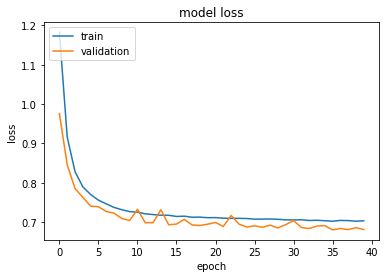

In [427]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()